<a href="https://colab.research.google.com/github/ChaconLima/mestrado/blob/introdu%C3%A7%C3%A3o-a-pesquisa-operacional/lista1_po170_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# solver
!pip install pulp


In [14]:
# Exemplo_1

# Import PuLP modeler functions
from pulp import *


prob = LpProblem("The Whiskas Problem", LpMinimize)

# The 2 variables Beef and Chicken are created with a lower limit of zero
x1 = LpVariable("ChickenPercent", 0, None, LpInteger)
x2 = LpVariable("BeefPercent", 0)

# The objective function is added to 'prob' first
prob += 0.013 * x1 + 0.008 * x2, "Total Cost of Ingredients per can"


# The five constraints are entered
prob += x1 + x2 == 100, "PercentagesSum"
prob += 0.100 * x1 + 0.200 * x2 >= 8.0, "ProteinRequirement"
prob += 0.080 * x1 + 0.100 * x2 >= 6.0, "FatRequirement"
prob += 0.001 * x1 + 0.005 * x2 <= 2.0, "FibreRequirement"
prob += 0.002 * x1 + 0.005 * x2 <= 0.4, "SaltRequirement"


# The problem is solved using PuLP's choice of Solver
prob.solve()

print("Status:", LpStatus[prob.status])

for v in prob.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue)

obj = value(prob.objective)
print("The total cost of this balanced diet is: ${}".format(round(obj,2)))

Status: Optimal
BeefPercent = 66.0
ChickenPercent = 34.0
The total cost of this balanced diet is: $0.97


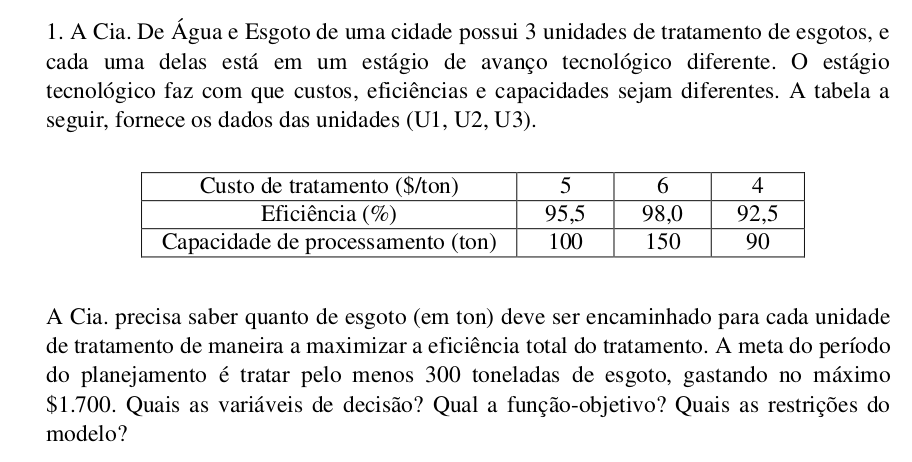